## SSFP simualtions in 1D
### Author: Zimu Huo
### Date: 02.2022
The SSFP/TrueFISP/FIESTA code for simulations can be found under /simulator folder. 
The signal simulated is a periodic function of local resonant frequency


-------------------------------------------------------------------------
References
    
    [1] 
    Author: Dr Neal K Bangerter
    Title: Contrast enhancement and artifact reduction in steady state magnetic resonance imaging
    Link: https://www.proquest.com/openview/41a8dcfb0f16a1289210b3bd4f9ea82b/1.pdf?cbl=18750&diss=y&pq-origsite=gscholar
    
    [2] 
    Author: Michael A. Mendoza
    Title: Water Fat Separation with Multiple Acquisition Balanced Steady State Free Precession MRI
    Link: https://scholarsarchive.byu.edu/cgi/viewcontent.cgi?article=5303&context=etd
         
         

    


In [1]:
from matplotlib import pyplot as plt
import numpy as np
from simulator.bSSFP import *

In [2]:
alpha = np.pi/2
size = 100
Nr = size
# T1 = 4000
# T2 = 2200
T1 = 790 
T2 = 92
M0 = 1
sample = size
samples = np.zeros([sample,3])
TR = 10
TE = TR/2
M0 = 2
phi = 0
dphi = 0
f = 3
betaGrad = np.linspace(-f*np.pi, f*np.pi, Nr)
for index, beta in enumerate(betaGrad):
    samples[index,:] = iterative_SSFP(M0 =M0 , alpha = alpha, phi = phi, dphi = dphi, beta = beta, TR= TR, TE= TE, T1 = T1, T2 = T2, Nr= Nr)


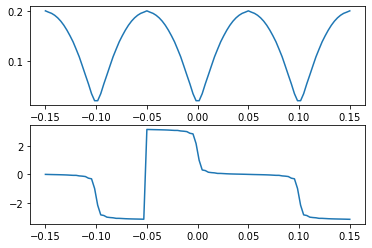

In [3]:
data = np.zeros([sample,1], dtype = complex)
data.real = samples[:,0].reshape(-1,1)
data.imag = samples[:,1].reshape(-1,1)
plt.figure()
plt.subplot(211)
x = np.linspace(-f*np.pi, f*np.pi, Nr)
plt.plot(x/(2*np.pi*TR),np.absolute(data))
plt.subplot(212)
plt.plot(x/(2*np.pi*TR),np.angle(data))
plt.show()